## Hypothesis Testing

Creating a Sample Distribution from our Control and Experimental groups

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/drug_trial.csv"
df = pd.read_csv(file_name)
df.head()

,group,mean_duration
0,Control,7
1,Control,5
2,Control,4
3,Control,5
4,Control,8


In [6]:
df['group'].unique()

array(['Control', 'Experimental'], dtype=object)

In [7]:
df.shape

(80, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   group          80 non-null     object
 1   mean_duration  80 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [14]:
# show means of control and experimental groups

control_mean = df[df['group'] == 'Control'].select_dtypes(include='number').mean()
exp_mean = df[df['group'] == 'Experimental'].select_dtypes(include='number').mean()
print("Control Mean: ", str(control_mean))
print("Experimental Mean: ", str(exp_mean))

Control Mean:  mean_duration    5.4
dtype: float64
Experimental Mean:  mean_duration    4.8
dtype: float64


Mean Differences Mean - -0.003196884355078123


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


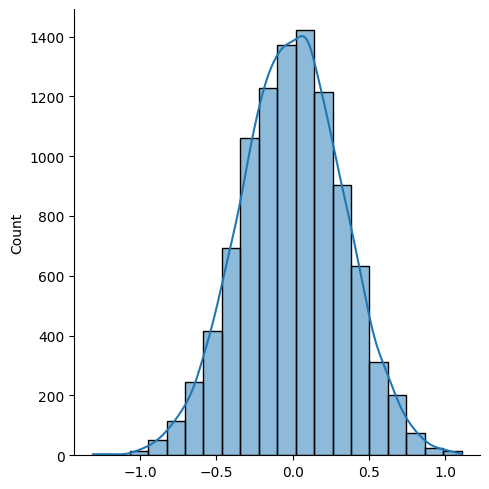

In [17]:
mean_difference = control_mean - exp_mean
data_points = list(df['mean_duration'])
mean_differences = []
number_of_iterations = 10000

for i in range(number_of_iterations):
    group1 = []
    group2 = []
    for data_point in data_points:
        random_assignment = np.random.randint(0,2) == True
        if random_assignment:
            group1.append(data_point)
        else:
            group2.append(data_point)

    trial_mean_difference = np.mean(group2) - np.mean(group1)
    mean_differences.append(trial_mean_difference)

print("Mean Differences Mean - " + str(np.array(mean_differences).mean()))
# Generate frequency or histogram plot
sns.displot(mean_differences, bins=20, kde= True)